In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('csvs/synergy_data.csv')
df['Purdue'] = df.team.map(lambda x: "Purdue" if x == "Purdue Boilermakers" else "")
df

,team,gp,time_pct,poss,pts,ppp,fg_miss,fg_made,fg_att,fg_pct,efg_pct,to_pct,ft_pct,score_pct,sf_pct,Purdue
0,Northern Colorado Bears,12,12.2,9.8,12.3,1.256,3.1,4.3,7.4,58.4,67.4,11.1,17.1,56.4,14.5,
1,Texas A&M-Commerce Lions,14,11.8,9.1,11.4,1.252,3.0,3.7,6.7,55.3,66.5,10.2,20.5,55.9,18.1,
2,Virginia Military Keydets,13,16.3,13.0,15.8,1.219,3.9,6.0,9.9,60.5,67.4,13.0,14.2,55.6,12.4,
3,Loyola (Chicago) Ramblers,12,11.6,8.9,10.8,1.215,2.8,3.9,6.7,58.8,64.4,12.1,17.8,57.0,15.0,
4,Bethune-Cookman Wildcats,12,21.5,17.2,20.8,1.214,5.1,7.7,12.8,60.1,68.6,14.6,13.6,54.4,9.2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Rutgers Scarlet Knights,12,13.1,10.2,7.4,0.730,4.3,2.4,6.8,35.8,41.4,20.5,14.8,36.1,11.5,
359,North Texas Mean Green,12,10.8,7.3,5.2,0.705,3.0,1.8,4.8,36.8,40.4,19.3,17.0,37.5,15.9,
360,Georgia Southern Eagles,13,13.3,10.0,6.9,0.692,4.5,2.6,7.2,36.6,39.8,21.5,7.7,32.3,6.2,
361,Dayton Flyers,13,14.1,10.5,6.8,0.654,5.6,2.5,8.1,30.5,32.4,14.7,12.5,30.9,11.0,


In [ ]:
sns.set_theme(style='white')
plt.figure(figsize = (16,12))
g = sns.scatterplot(data = df,
                x = 'poss',
                y = "ppp",
                ci = None,
                hue = 'Purdue',
                palette = ['#000000','#CEB888'],
                size= "Purdue",
                size_order= ['Purdue',""],
                sizes = (25,250))
g.legend_.set_title(None)
plt.title("Transition defensive posessions per game vs points allowed per possession",size= 16)
plt.xlabel('Transition possessions defended per game',size = 16)
plt.ylabel("Points allowed per possession in transition",size = 16)
#plt.axvline(x = np.quantile(df.time_pct.to_numpy(),0.90),linestyle = '--',color = 'blue')
#plt.axhline(y = np.quantile(df.PPP.to_numpy(),0.90),linestyle = '--',color = 'blue')
#plt.text(s = '90th percentile cutoffs',x = 12,y = 0.4)
#plt.savefig('figures/post_ups.png')
plt.show();


In [28]:
pd.options.display.max_columns = None
df = pd.read_csv('csvs/kp_data.csv')
df_summary = pd.read_csv('csvs/kp_summary.csv')
df_offense = pd.read_csv('csvs/kp_offense.csv')
df = df.merge(df_summary,left_on = "TeamName",right_on = "TeamName").merge(df_offense, left_on = 'TeamName',right_on = "TeamName")
df['Purdue'] = df.TeamName.map(lambda x: "Purdue" if x == "Purdue" else "")
#df = df.loc[df.RankAdjOE <= 100]
df

,TeamName,FG2Pct,RankFG2Pct,FG3Pct,RankFG3Pct,FTPct,RankFTPct,BlockPct,RankBlockPct,OppFG2Pct,RankOppFG2Pct,OppFG3Pct,RankOppFG3Pct,OppFTPct,RankOppFTPct,OppBlockPct,RankOppBlockPct,FG3Rate,RankFG3Rate,OppFG3Rate,RankOppFG3Rate,ARate,RankARate,OppARate,RankOppARate,StlRate,RankStlRate,OppStlRate,RankOppStlRate,DFP,NSTRate,RankNSTRate,OppNSTRate,RankOppNSTRate,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,Season,eFGPct,RankeFGPct,TOPct,RankTOPct,ORPct,RankORPct,FTRate,RankFTRate,Purdue
0,Abilene Christian,48.459384,235,38.613861,17,66.666667,291,6.395349,289,58.139535,350,31.034483,84,73.303167,274,7.282913,73,36.135957,225,33.590734,72,60.557769,28,55.511811,274,0.110071,75,0.092691,165,NaN,11.007115,295,11.586437,29,69.0462,170,68.7805,178,100.2420,207,101.5740,184,105.0790,240,102.6440,176,-1.069930,182,2023,51.878354,102,20.276264,263,24.852071,288,28.980322,224,
1,Air Force,57.297297,18,36.170213,74,70.075758,211,13.793103,31,48.073022,127,26.819923,8,71.264368,201,9.189189,190,47.067239,19,34.615385,96,66.465257,6,41.693811,19,0.108086,88,0.088233,125,NaN,10.587992,276,7.940994,317,64.1650,347,63.7165,348,107.3650,75,100.3960,212,96.1378,87,100.4360,133,-0.039805,168,2023,55.865522,17,19.411319,210,23.399015,319,37.768240,44,
2,Akron,46.518106,278,32.352941,223,70.351759,202,5.733945,317,45.871560,65,38.118812,340,70.769231,184,10.863510,277,43.106181,53,31.661442,40,52.156863,149,52.346570,207,0.096319,164,0.096319,198,NaN,8.410914,86,8.682234,256,66.2561,288,65.5959,305,100.1300,209,102.9420,160,98.2643,111,99.4617,118,3.480000,125,2023,47.385103,279,18.042767,121,30.730479,134,31.537242,167,
3,Alabama,52.546296,95,34.293194,127,71.212121,168,12.251656,47,42.549669,14,29.803922,49,69.090909,129,11.342593,299,46.928747,20,29.685681,14,56.424581,68,42.942943,29,0.074687,309,0.106554,284,NaN,11.452045,316,8.564138,270,74.6494,12,75.3793,3,108.1890,61,113.2350,17,92.3884,43,90.0597,14,23.175600,9,2023,52.027027,96,22.107425,330,36.328125,19,40.540541,25,
4,Alabama A&M,43.795620,329,34.825871,111,65.838509,311,10.322581,110,54.516129,305,36.996337,310,64.912281,21,9.732360,232,32.843137,295,46.826758,350,50.000000,198,54.814815,259,0.105786,101,0.087926,120,NaN,11.265477,307,10.990709,57,72.7887,33,71.9517,42,92.8749,318,92.3001,344,108.3600,295,105.8440,256,-13.543500,329,2023,46.568627,298,20.058045,253,26.315789,252,26.307190,290,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Wright St.,52.049911,107,33.507853,165,70.945946,177,6.278027,293,52.690583,268,35.483871,263,71.038251,194,6.238859,33,25.398936,358,38.482759,208,51.123596,174,46.107784,59,0.090537,201,0.106381,283,NaN,7.242994,28,10.298632,90,72.1158,45,72.6712,32,99.4338,220,99.5511,233,101.6060,168,103.3250,199,-3.773570,222,2023,51.595745,109,17.881141,112,24.038462,312,19.680851,359,
359,Wyoming,54.658385,47,33.012821,186,69.683258,219,4.761905,346,52.882206,275,33.695652,191,77.419355,356,12.422360,335,49.211356,7,40.888889,281,49.103943,227,46.052632,58,0.071265,326,0.089081,135,NaN,9.544413,194,10.435225,80,64.8311,332,64.7477,330,103.0250,152,106.5630,82,104.5450,228,103.6680,206,2.895130,132,2023,52.129338,92,18.452532,150,26.041667,259,34.858044,85,
360,Xavier,55.025554,38,40.839695,3,71.626298,155,10.490694,104,47.038917,92,37.407407,327,67.816092,85,8.688245,157,30.859835,315,31.358885,30,68.604651,3,53.825858,239,0.097736,161,0.115942,324,NaN,7.378129,34,8.623787,265,74.5446,13,73.1379,24,112.5000,25,114.9220,9,99.6067,135,97.1644,79,17.757500,27,2023,56.949352,8,18.972332,180,31.415929,108,34.040047,106,
361,Yale,54.707379,44,32.684825,211,72.916667,110,9.793814,130,44.329897,39,29.473684,42,65.463918,31,7.124682,60,39.538462,138,32.871972,55,49.163880,224,50.000000,152,0.093307,185,0.091935,159,NaN,

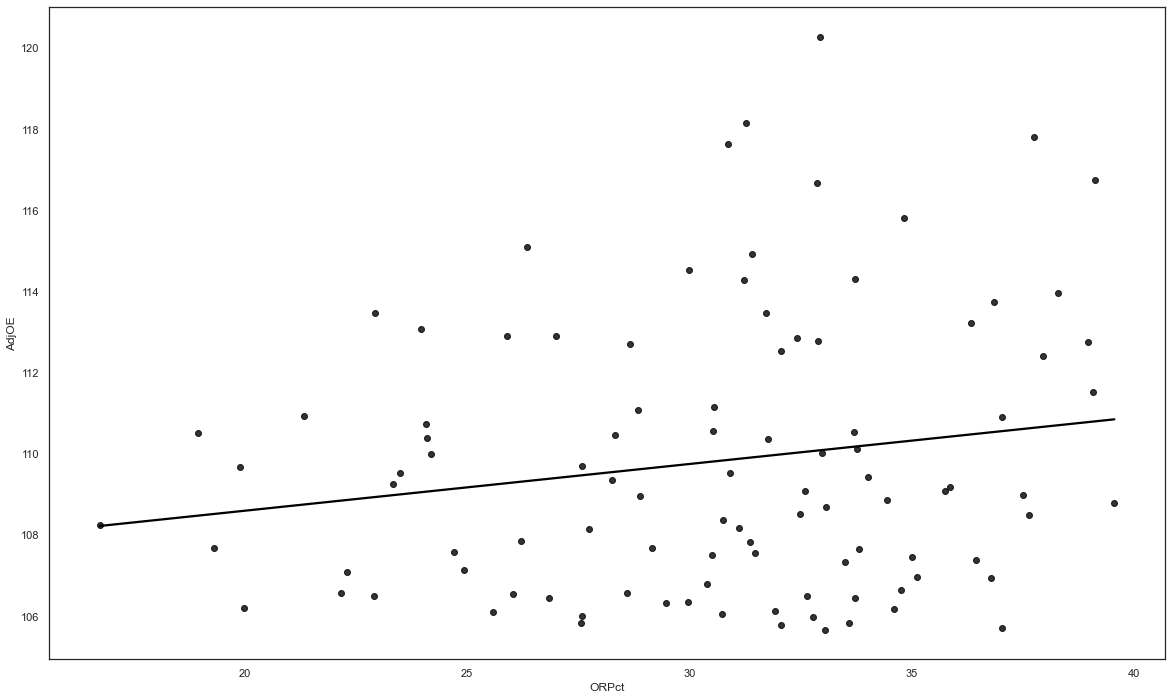

In [24]:
sns.set_theme(style='white')
plt.figure(figsize = (20,12))
sns.regplot(data = df,
                x = 'ORPct',
                y = 'AdjOE',
                color = 'black',
                ci = None)
plt.show();

In [31]:
df.DFP

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
358   NaN
359   NaN
360   NaN
361   NaN
362   NaN
Name: DFP, Length: 363, dtype: float64

In [35]:
[i for i in x.columns if not i.startswith("Rank")]

['FG2Pct',
 'FG3Pct',
 'FTPct',
 'BlockPct',
 'OppFG2Pct',
 'OppFG3Pct',
 'OppFTPct',
 'OppBlockPct',
 'FG3Rate',
 'OppFG3Rate',
 'ARate',
 'OppARate',
 'StlRate',
 'OppStlRate',
 'NSTRate',
 'OppNSTRate',
 'Tempo',
 'AdjTempo',
 'OE',
 'DE',
 'AdjDE',
 'AdjEM',
 'Season',
 'eFGPct',
 'TOPct',
 'ORPct',
 'FTRate']

In [98]:
import statsmodels.api as sm

x = df.drop(['AdjOE','TeamName','Purdue','DFP','Season','AdjEM','AdjDE','OE','DE','BlockPct'],axis = 1)
x = x[[i for i in x.columns if not i.startswith("Rank") and not i.startswith("Opp")]]
y = df.AdjOE.to_numpy()
x_= sm.add_constant(x)
model = sm.OLS(y,x_)
result = model.fit()
summary = result.summary()
summary
# #target_table = summary.tables[1]
# summary_df = pd.DataFrame(target_table)
# summary_df.iloc[0,0] = 'variable'
# summary_df.iloc[0,4] = "p_value"
# summary_df.columns = summary_df.iloc[0]
# summary_df = summary_df.drop(0)
# #summary_df.p_value = summary_df.p_value.astype(float)
# summary_df.p_value.astype(float)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     157.2
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          4.47e-137
Time:                        09:18:14   Log-Likelihood:                -833.09
No. Observations:                 363   AIC:                             1694.
Df Residuals:                     349   BIC:                             1749.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1257      4.504      6.245      0.000      19.268      36.984
FG2Pct         0.0662      0.248      0.267      0.790      -0.422       0.554
FG3Pct         0.0777      0.226      0.344      0.731      -0.366       0.522
FTPct          0.2487      0.030      8.375      0.000       0.190       0.307
FG3Rate        0.0239      0.026      0.907      0.365      -0.028       0.076
ARate          0.0644      0.025      2.545      0.011       0.015       0.114
StlRate        1.5082      6.916      0.218      0.827     -12.093      15.110
NSTRate       -0.0922      0.136     -0.678      0.498      -0.360       0.175
Tempo          0.0849      0.159      0.535      0.593      -0.227       0.397
AdjTempo      -0.0411      0.162     -0.254      0.800      -0.360       0.278
eFGPct         0.8946      0.398      2.249      0.025       0.112       1.677
TOPct         -0.9262      0.092    -10.013      0.000      -1.108      -0.744
ORPct          0.4807      0.031     15.601      0.000       0.420       0.541
FTRate         0.1031      0.023      4.479      0.000       0.058       0.148
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.789
Skew:                           0.083   Prob(JB):                        0.674
Kurtosis:                       2.843   Cond. No.                     8.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
x = x[[i for i in result.pvalues[result.pvalues <= 0.05].index.tolist() if i != "const"]]
y = df.AdjOE.to_numpy()
x_= sm.add_constant(x)
model = sm.OLS(y,x_)
result = model.fit()
summary = result.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     344.5
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          6.38e-145
Time:                        09:18:18   Log-Likelihood:                -834.39
No. Observations:                 363   AIC:                             1683.
Df Residuals:                     356   BIC:                             1710.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2171      3.260      9.576      0.000      24.806      37.628
FTPct          0.2505      0.029      8.607      0.000       0.193       0.308
ARate          0.0728      0.024      3.086      0.002       0.026       0.119
eFGPct         1.0267      0.042     24.250      0.000       0.943       1.110
TOPct         -0.9662      0.060    -16.141      0.000      -1.084      -0.848
ORPct          0.4708      0.029     16.332      0.000       0.414       0.527
FTRate         0.0997      0.022      4.605      0.000       0.057       0.142
==============================================================================
Omnibus:                        0.564   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.659
Skew:                           0.086   Prob(JB):                        0.719
Kurtosis:                       2.883   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""